In [22]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from itertools import combinations, product

from sklearn.base import clone
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFdr, VarianceThreshold
from sklearn.preprocessing import StandardScaler, RobustScaler, MaxAbsScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.decomposition import PCA

In [17]:
df = pd.read_csv('../data/train.csv', na_values="-1")
df.fillna(value=np.nan,inplace=True)

In [18]:
df.shape

(595212, 59)

In [19]:
df.sample(10)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
273460,683409,0,1,1.0,1,0.0,0.0,1,0,0,...,10,1,3,9,0,1,0,1,0,1
362746,906267,0,0,2.0,0,1.0,4.0,0,1,0,...,7,1,0,9,0,0,1,0,0,0
224408,560649,0,4,4.0,7,1.0,0.0,0,0,1,...,10,0,2,12,0,0,1,1,0,0
578740,1447067,0,4,3.0,9,1.0,0.0,0,0,1,...,7,1,5,6,0,1,1,0,0,0
110264,276027,0,1,1.0,4,0.0,0.0,1,0,0,...,5,1,3,9,0,0,1,0,0,1
227648,568896,0,1,1.0,8,0.0,0.0,1,0,0,...,2,3,5,4,0,0,0,0,0,0
501738,1253847,0,3,1.0,6,1.0,6.0,0,0,1,...,4,0,1,8,0,1,1,0,0,0
487023,1217048,0,3,1.0,6,1.0,4.0,0,1,0,...,8,1,1,9,0,0,1,1,0,0
19616,49160,0,3,1.0,9,0.0,0.0,1,0,0,...,9,1,3,11,0,0,1,0,0,0
248662,621142,0,3,1.0,1,1.0,0.0,0,1,0,...,8,1,6,10,0,1,1,0,0,0


In [5]:
y = df.target
df.drop(['target','id'], axis=1, inplace=True)
X = df.values

### Notes
The following is related to the naming of the columns:
1. ind := individual
2. reg := region
3. car := car
4. calc := calculated feature

In [6]:
features_dict = {}
for x in ['ind', 'reg', 'car', 'calc']:
    for y in ['cat', 'bin', 'con']:
        features_dict[x+'_'+y] =[]
        for i in df.columns.tolist()[2:]:
            j = i.split('_')
            if len(j) == 3:
                j.append('con')
            if j[1]==x and j[3]==y:
                features_dict[x+'_'+y].append(i)

In [7]:
features_dict_data_type = {}
for y in ['cat', 'bin', 'con']:
    features_dict_data_type[y]=[]
    for i in df.columns.tolist()[2:]:
        j = i.split('_')
        if len(j) == 3:
            j.append('con')
        if j[3]==y:
            features_dict_data_type[y].append(i)

In [8]:
features_dict_data_label = {}
for x in ['ind', 'reg', 'car', 'calc']:
    features_dict_data_label[x] =[]
    for i in df.columns.tolist()[2:]:
        j = i.split('_')
        if j[1]==x:
            features_dict_data_label[x].append(i)

In [11]:
features_dict_data_label['car']

['ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15']

In [ ]:
 ('ps_reg_01', 'ps_car_02_cat'),  
('ps_reg_01', 'ps_car_04_cat'),

/home/laith/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/home/laith/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


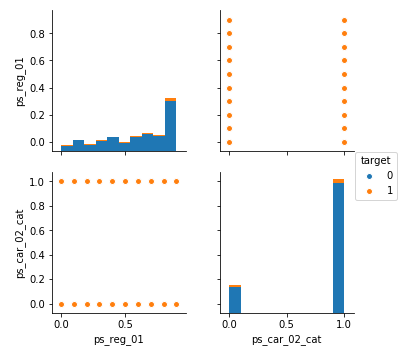

In [21]:
sns.pairplot(df, vars=['ps_reg_01', 'ps_car_02_cat'], hue='target')

In [13]:
mean_imp = Imputer(missing_values=-1, strategy='mean', axis=0)
mode_imp = Imputer(missing_values=-1, strategy='most_frequent', axis=0)
x1 = mean_imp.fit_transform(df[['ps_reg_01']]).ravel()
x2 = mode_imp.fit_transform(df[['ps_car_04_cat']]).ravel()

NameError: name 'Imputer' is not defined

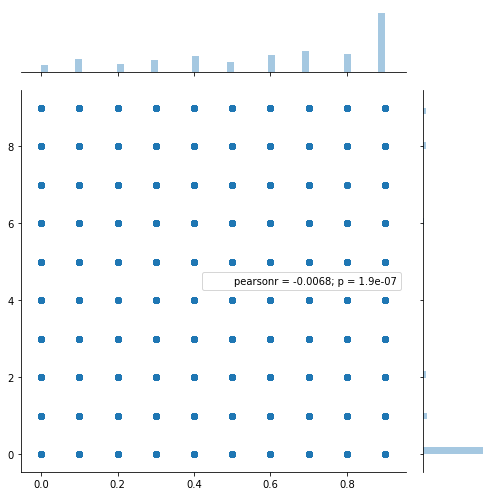

In [65]:
g = sns.jointplot(x1, x2, size=7, space=0)
plt.tight_layout()

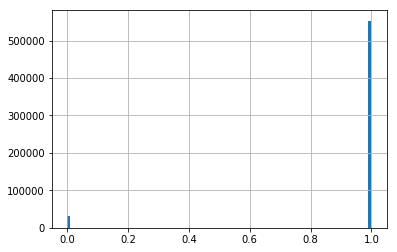

In [57]:
df['ps_car_07_cat'].hist(bins=100)

ValueError: Could not interpret input 'target'

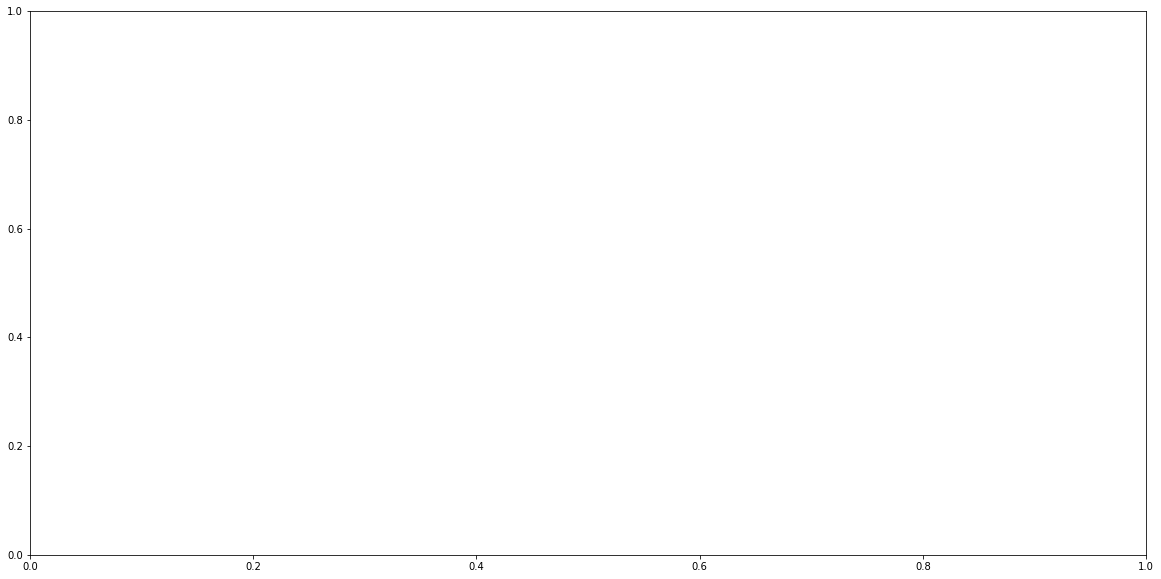

In [15]:
for f in features_dict_data_type['cat']:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,10))
    # Calculate the percentage of target=1 per category value
    sns.countplot(x=f, hue="target", data=df)
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show();


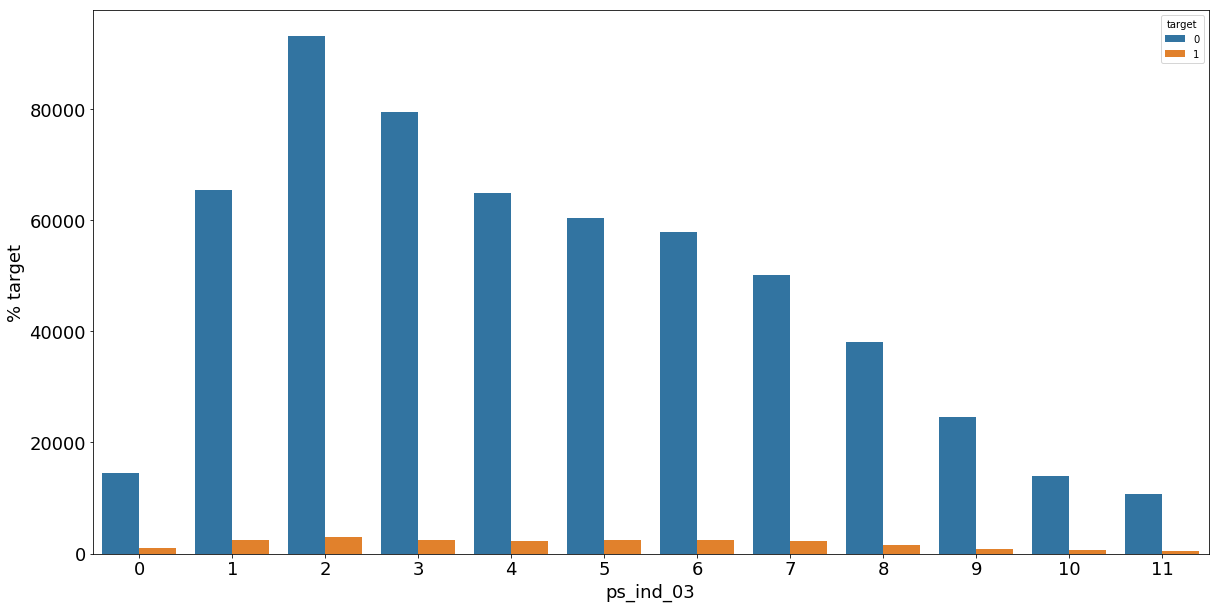

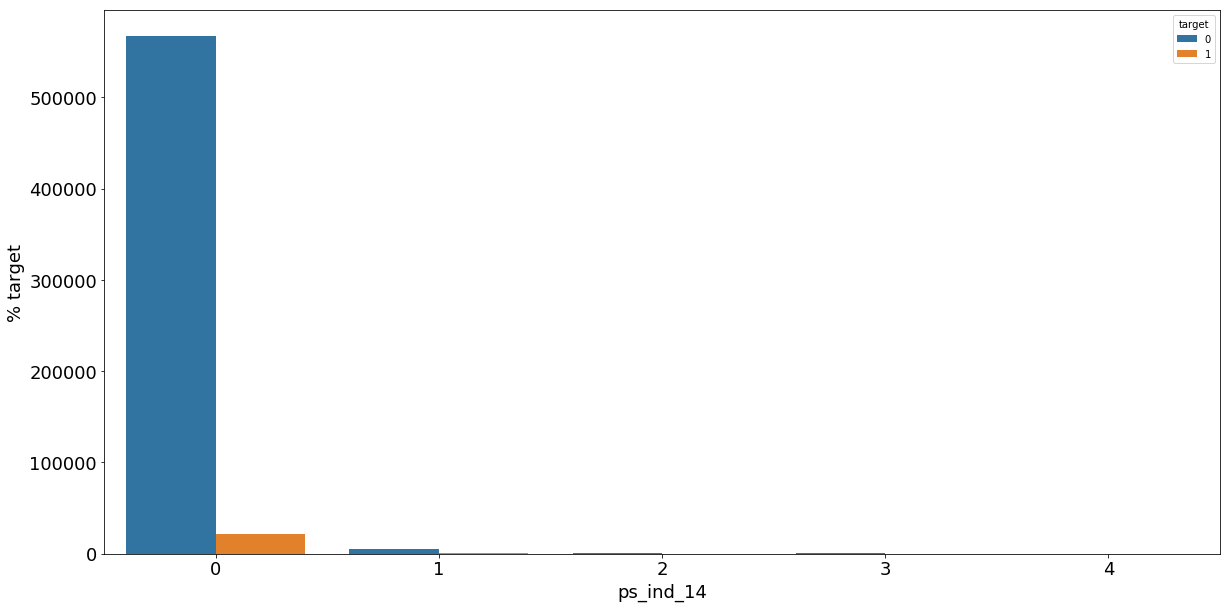

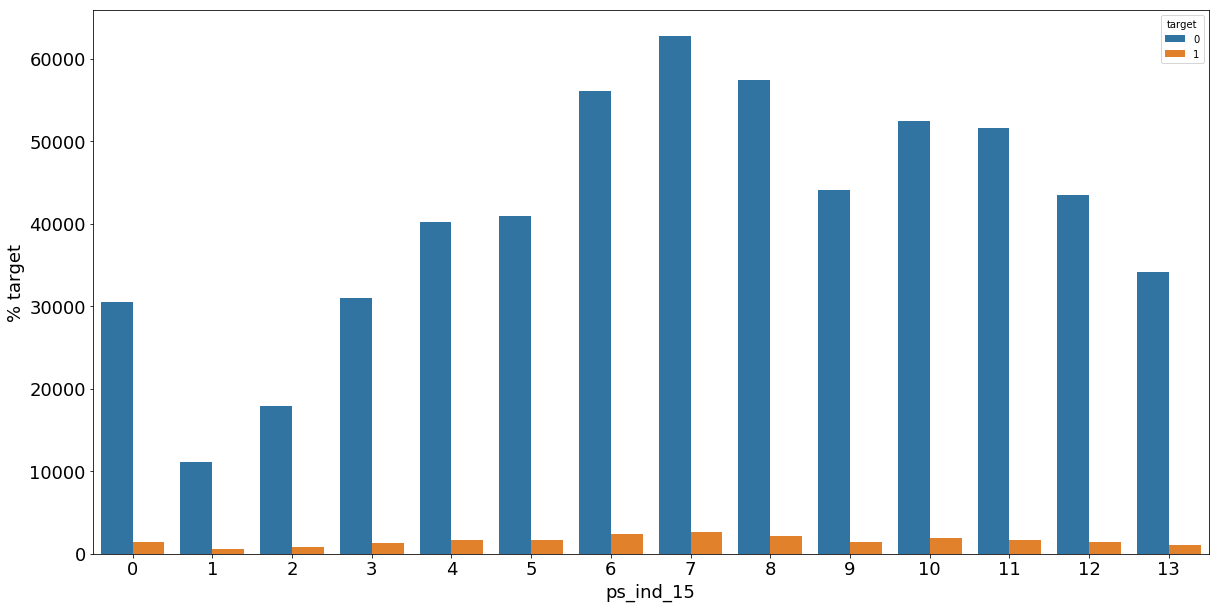

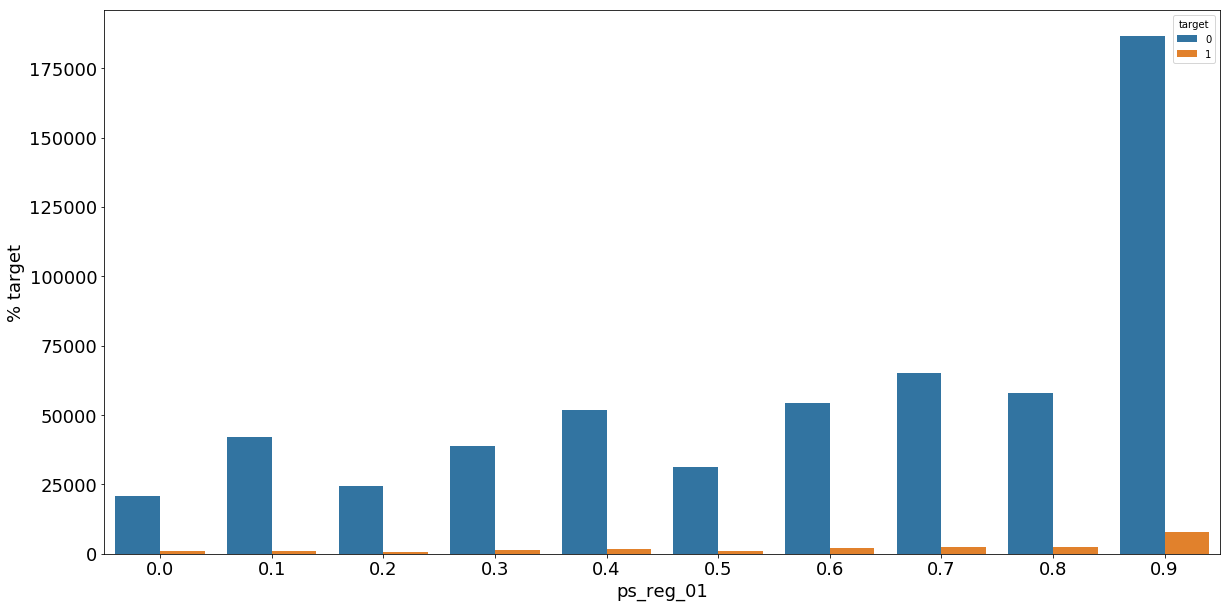

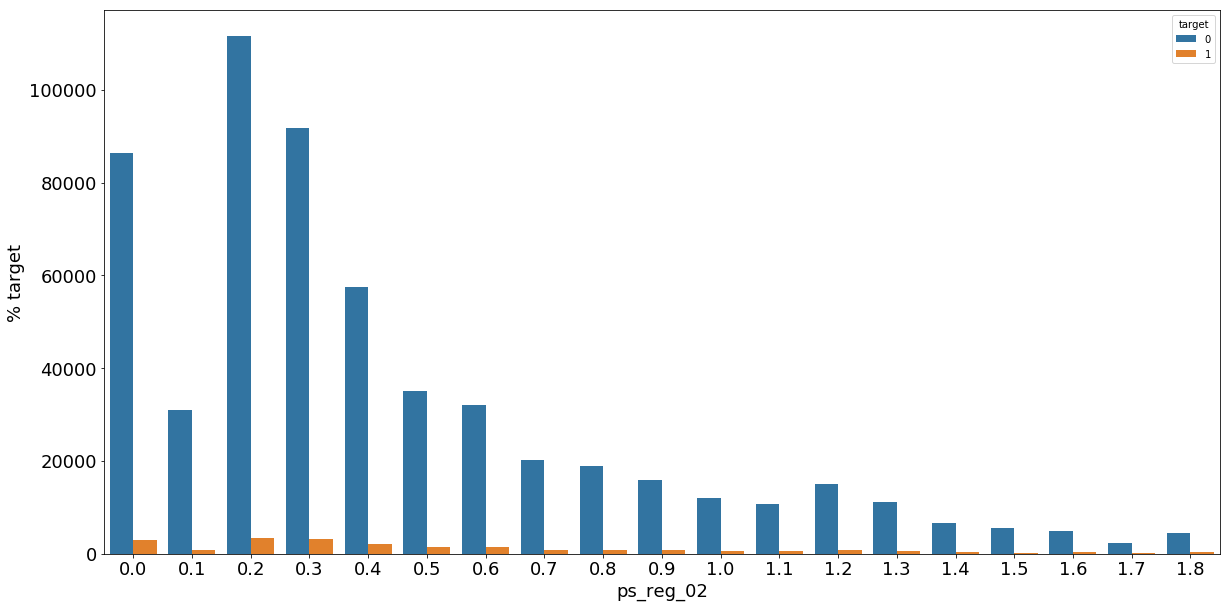

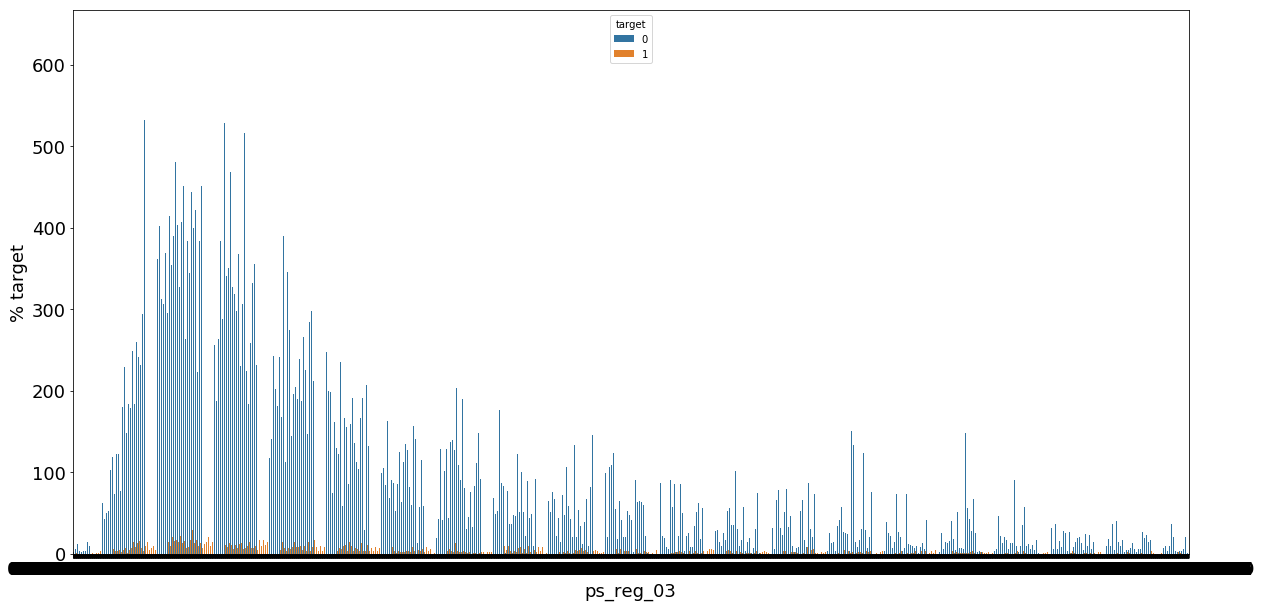

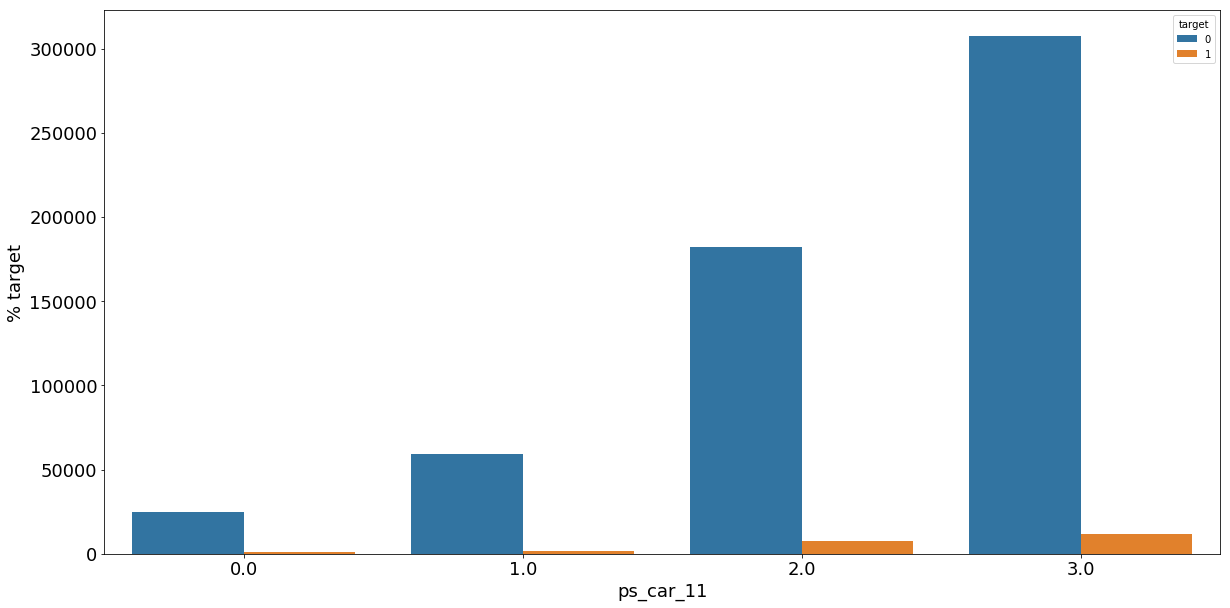

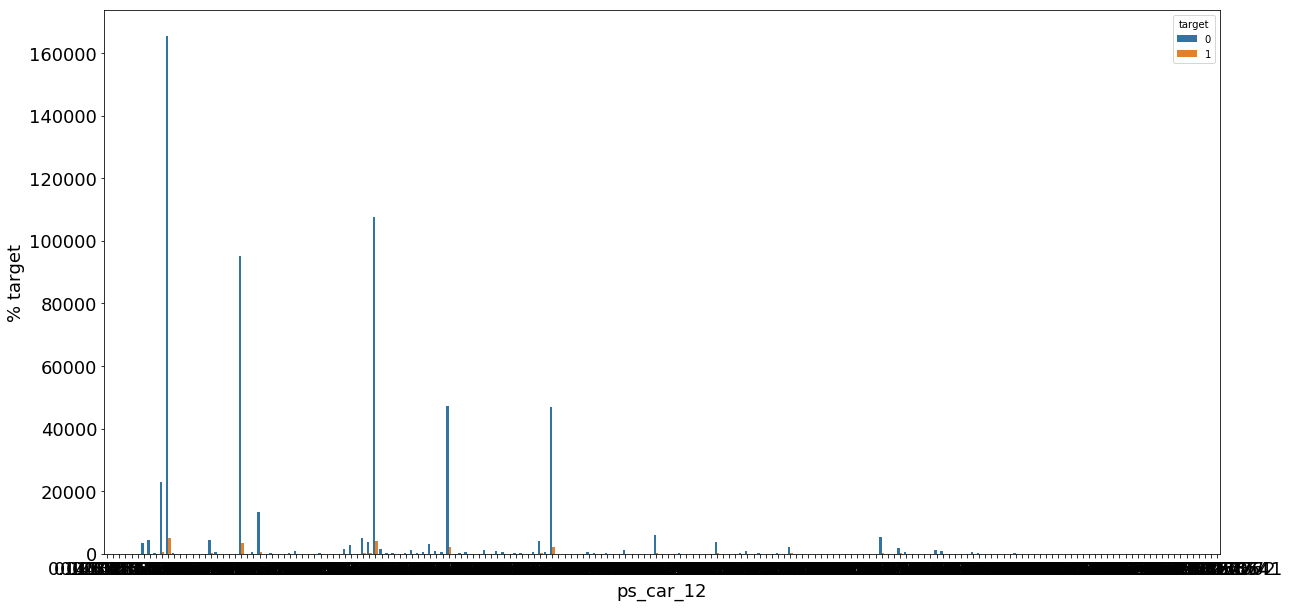

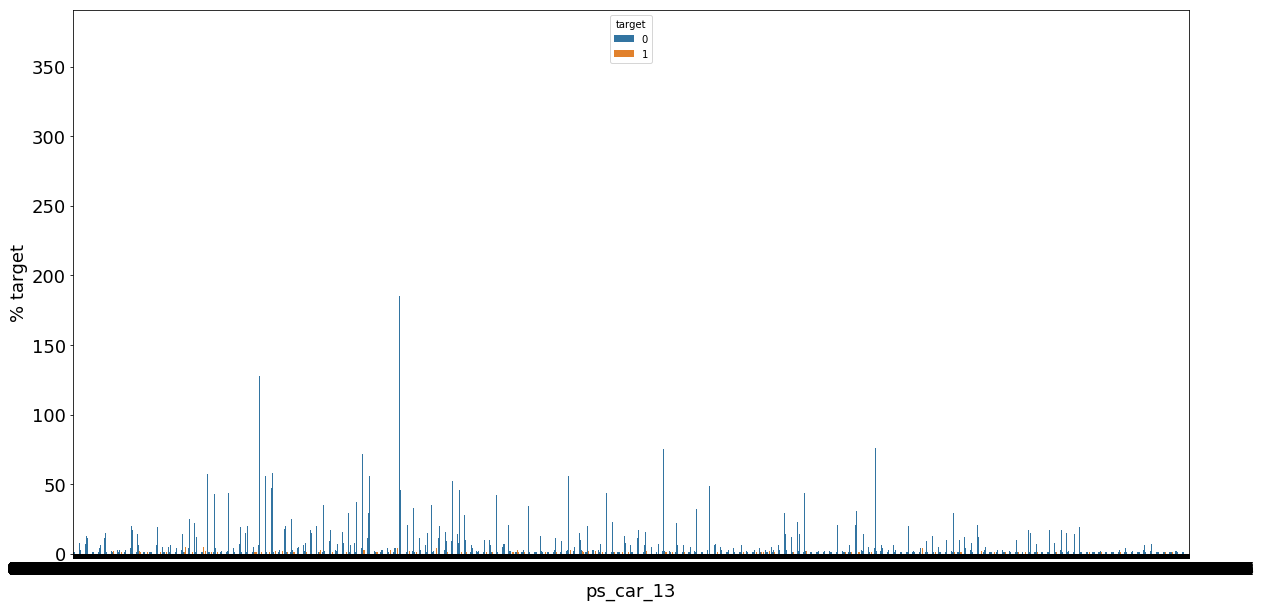

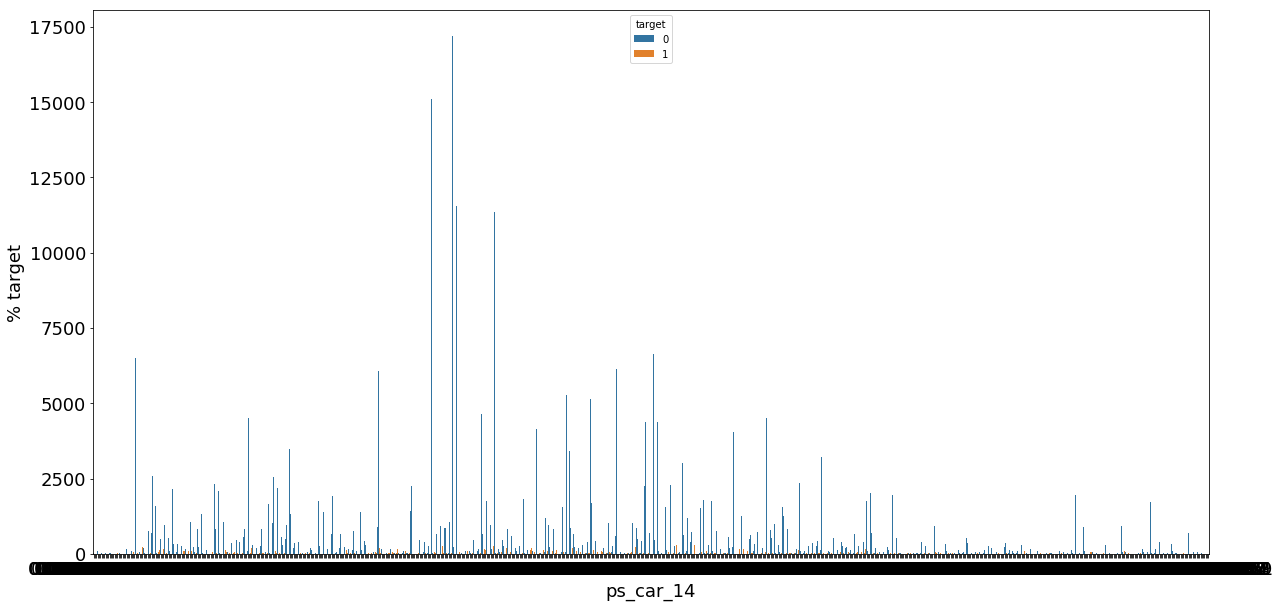

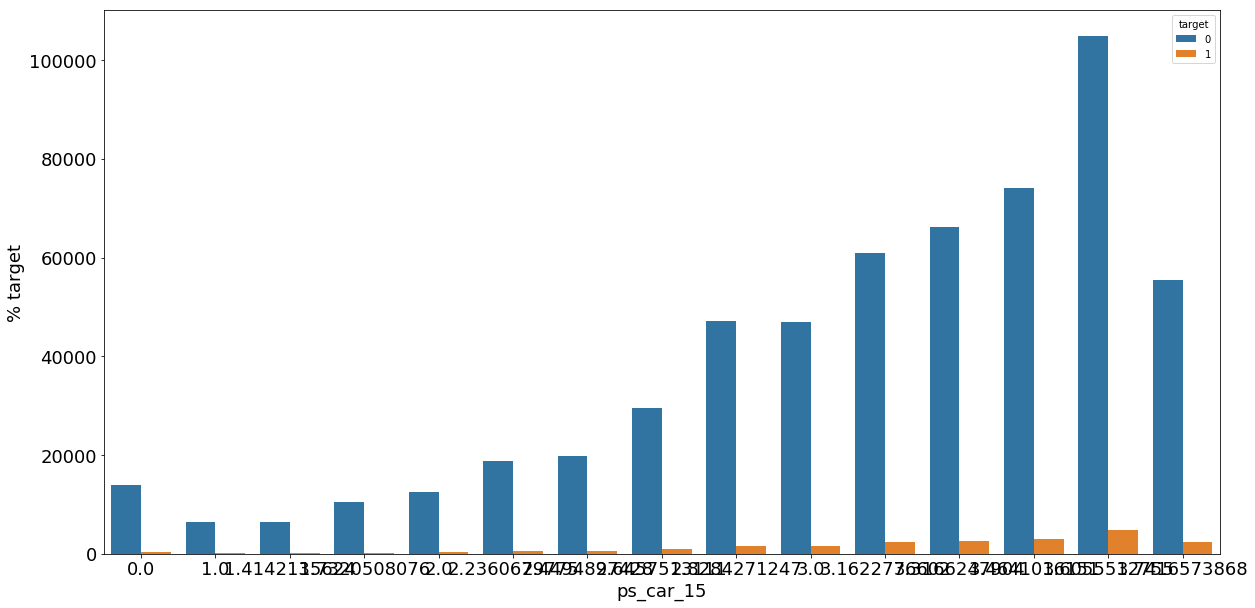

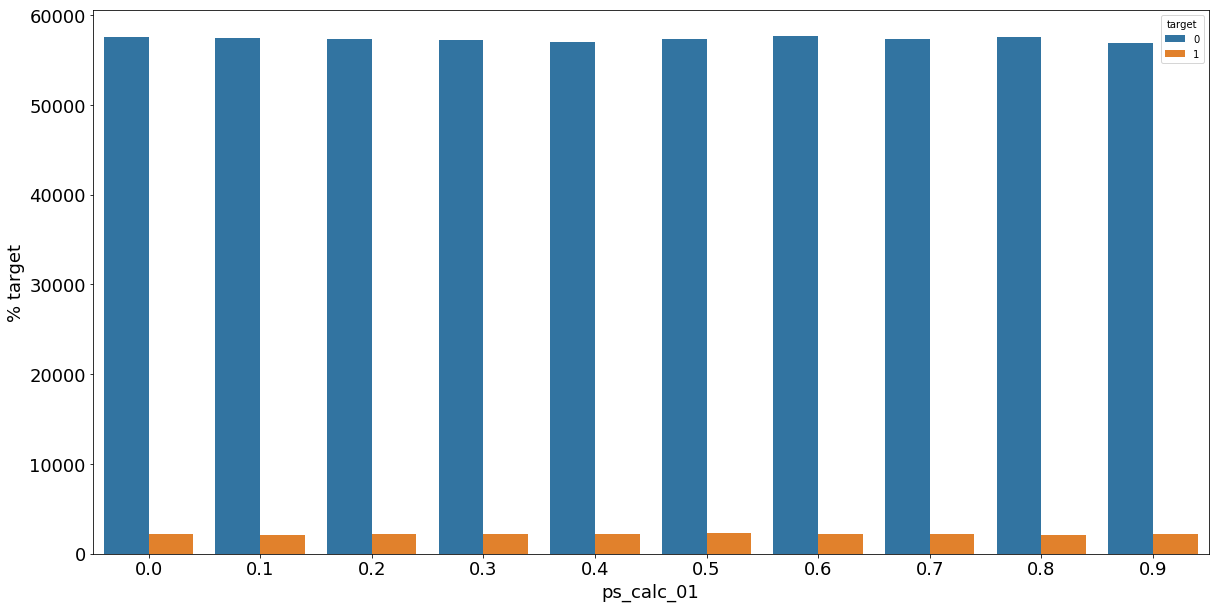

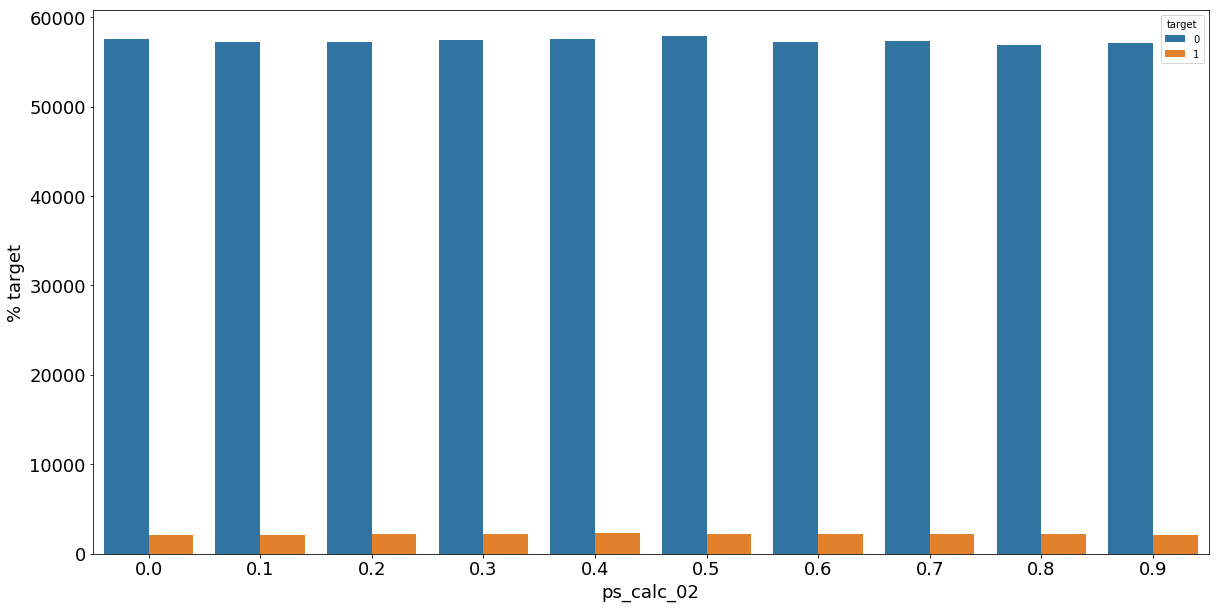

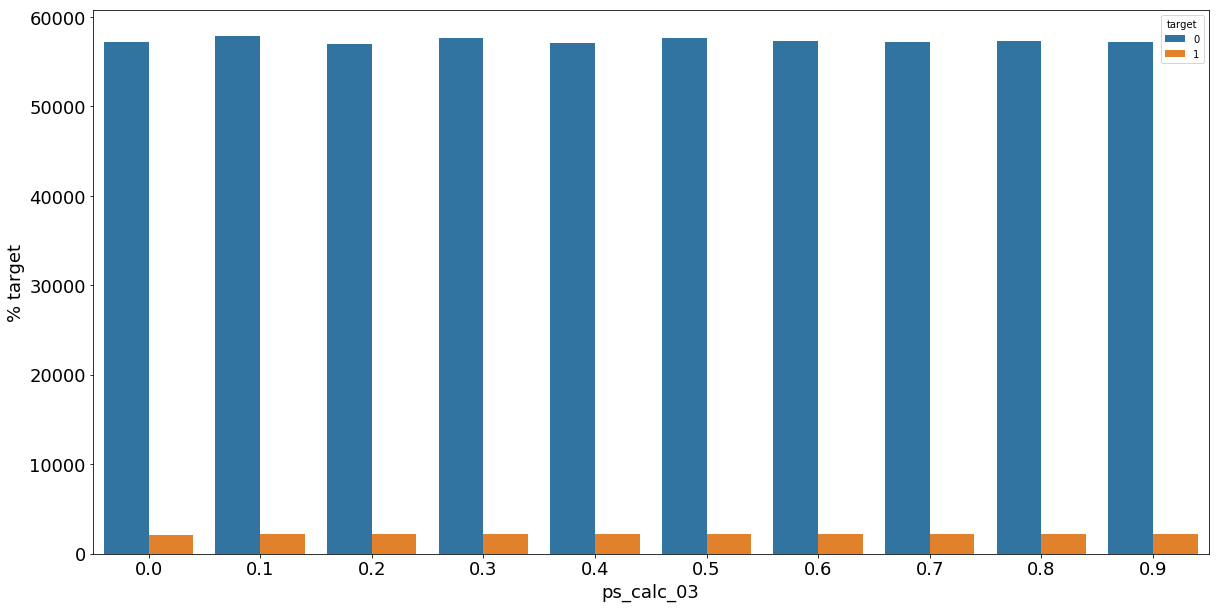

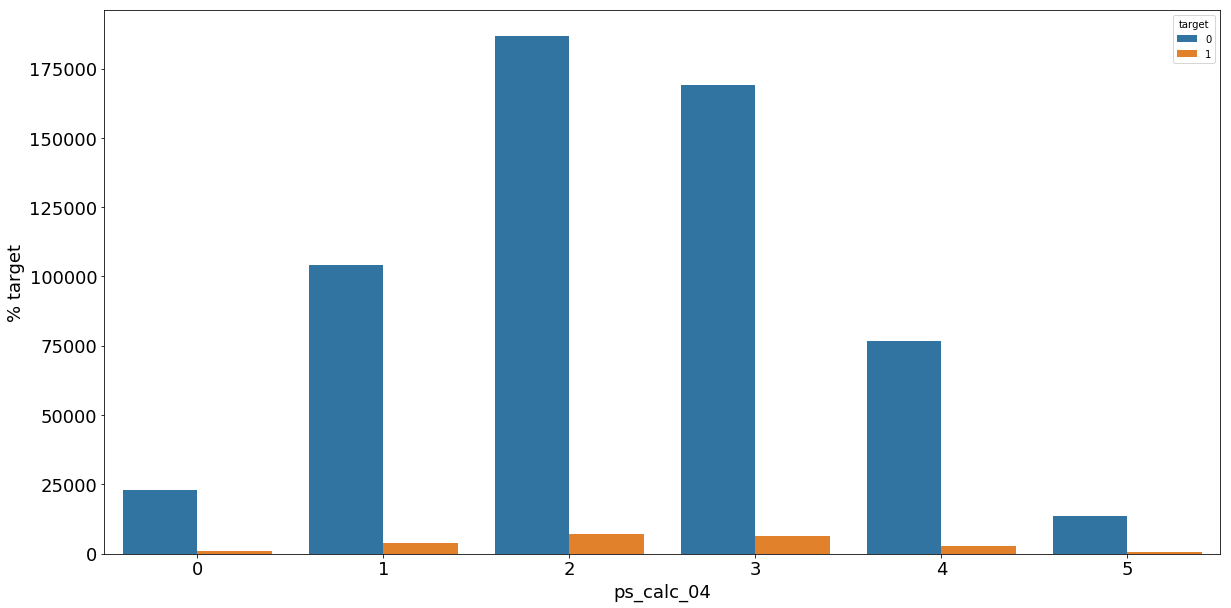

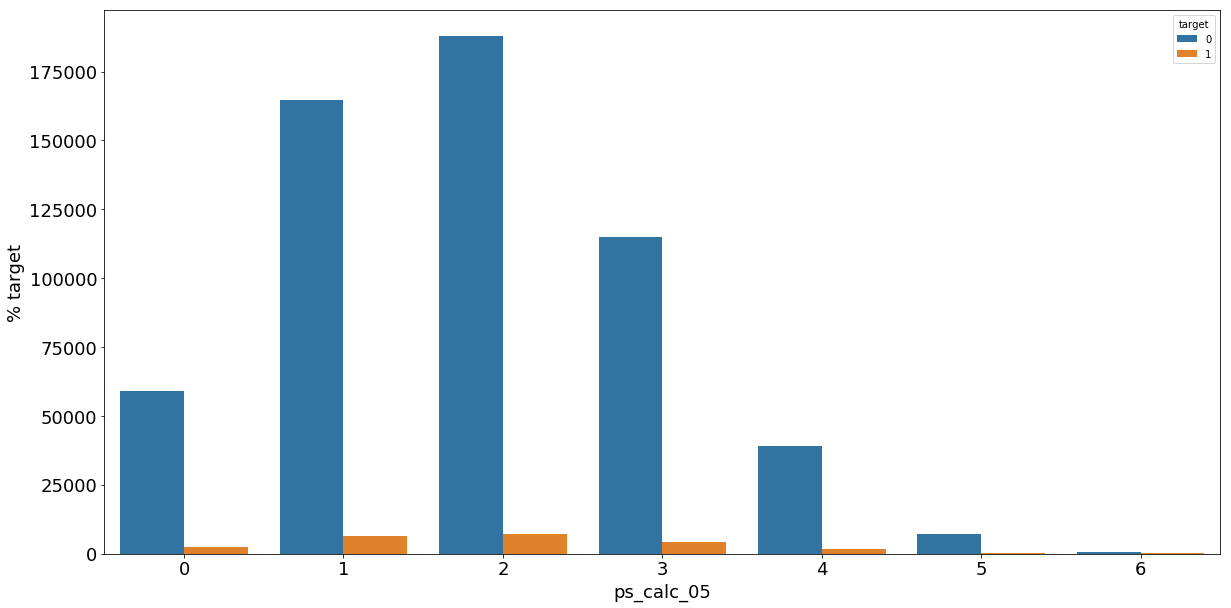

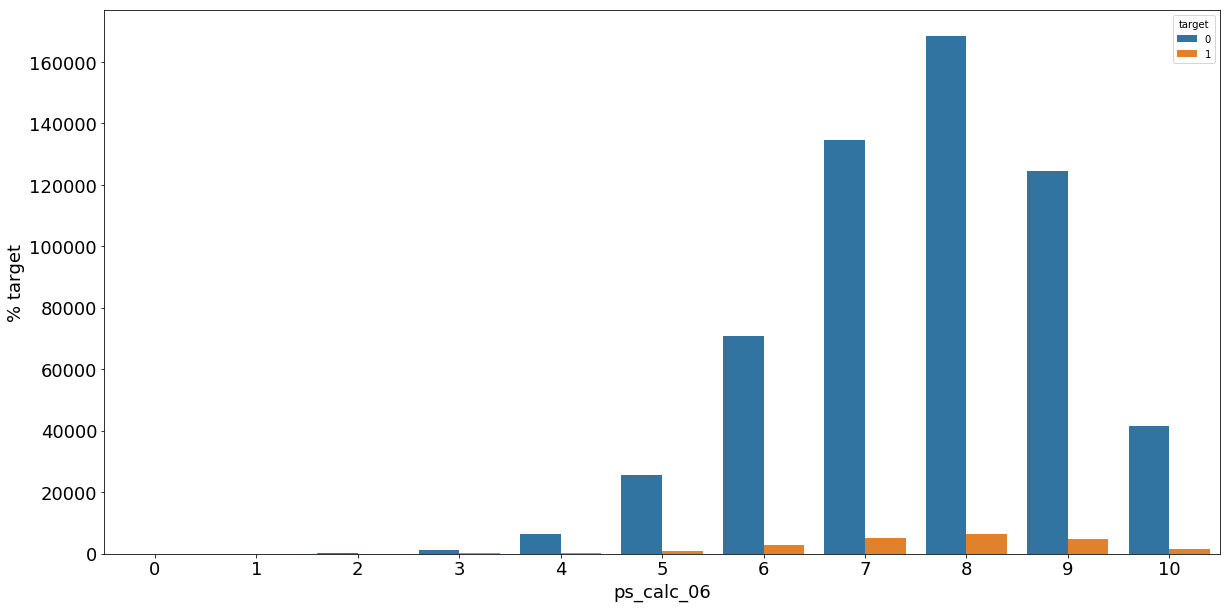

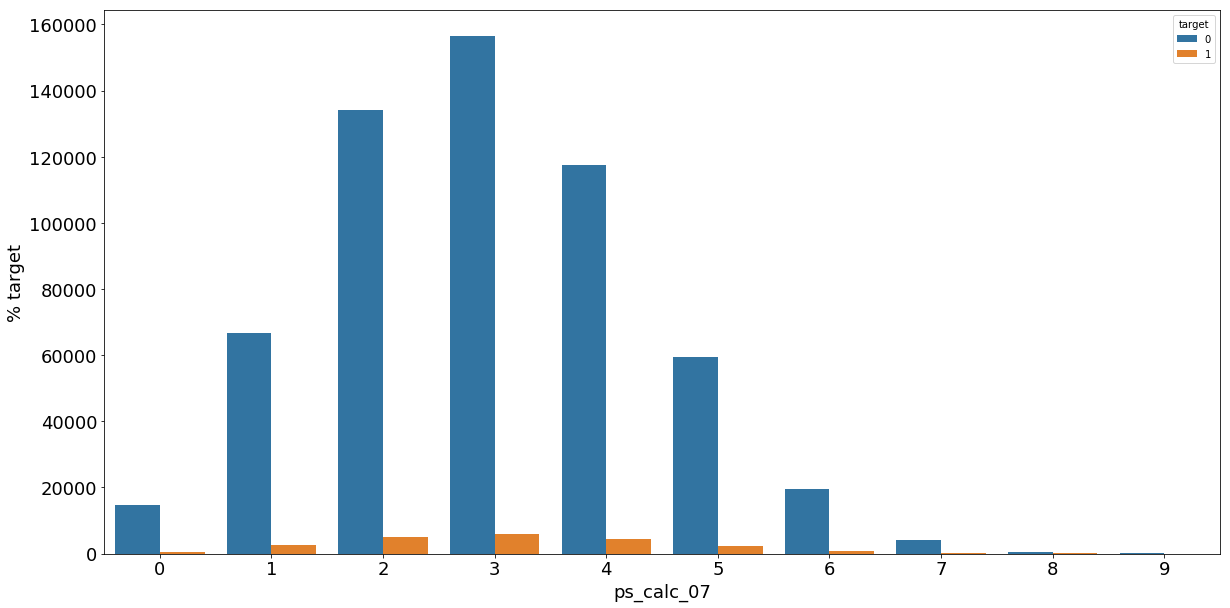

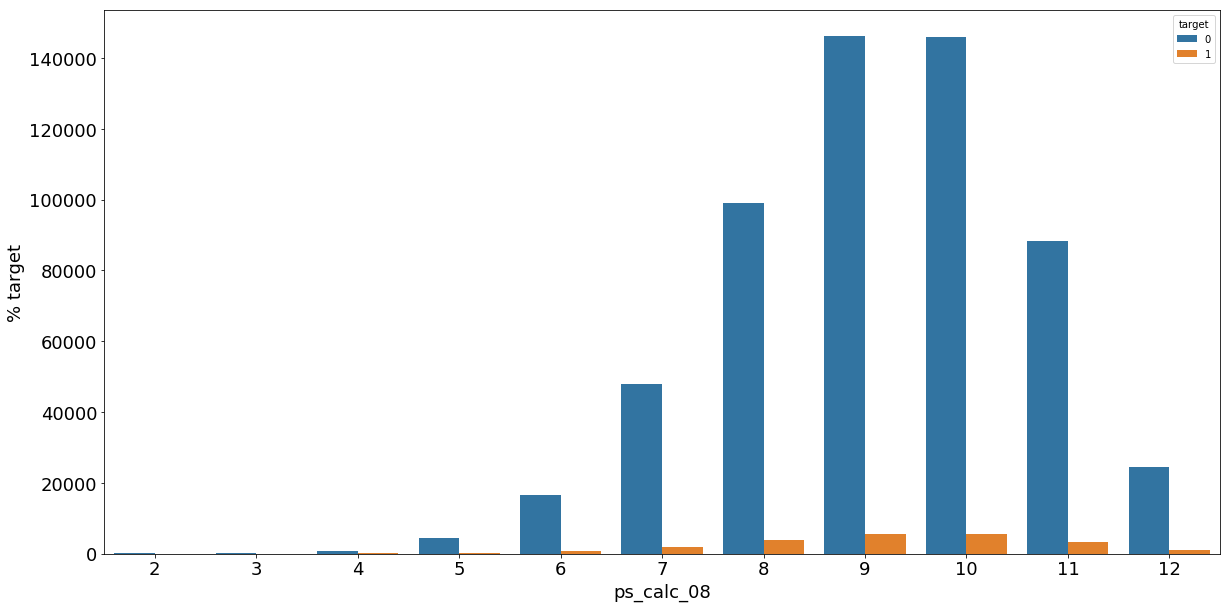

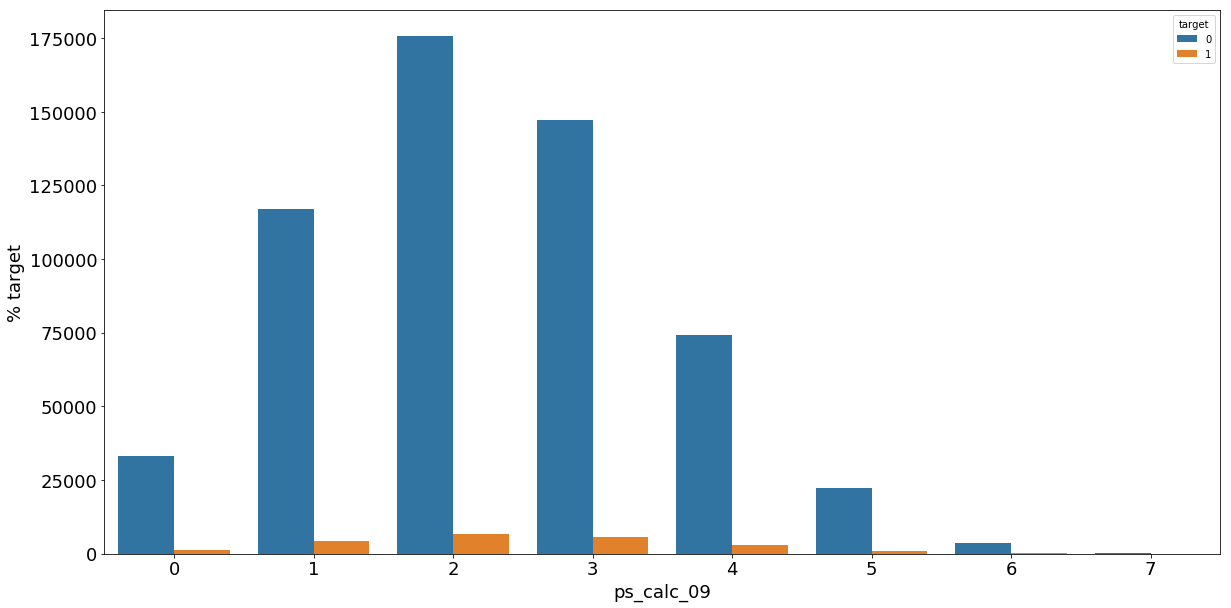

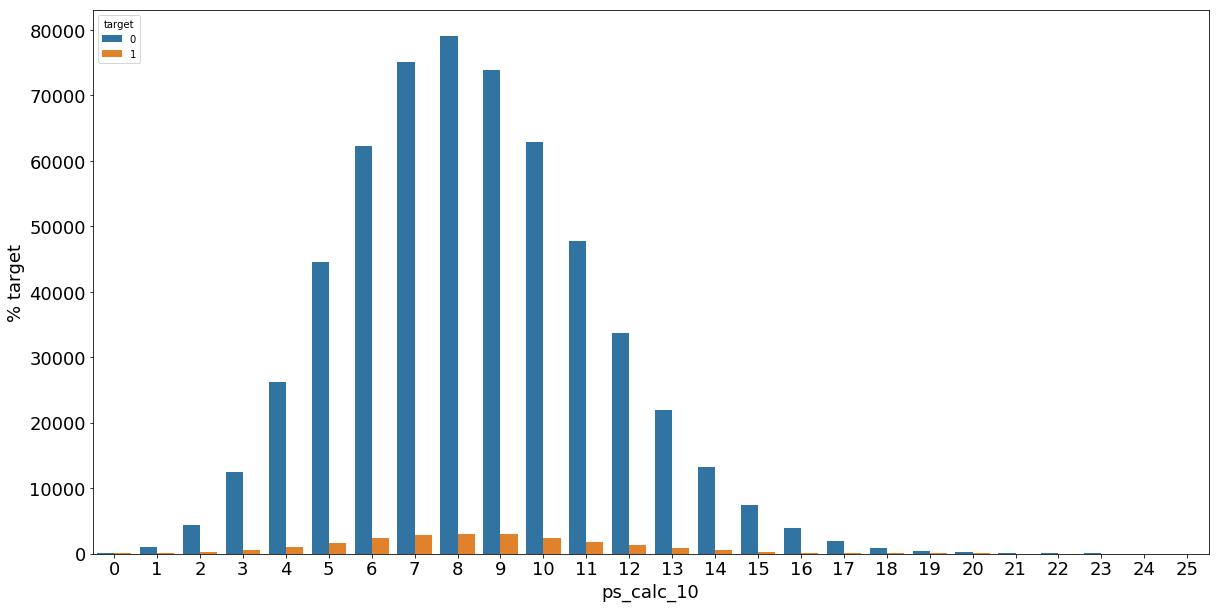

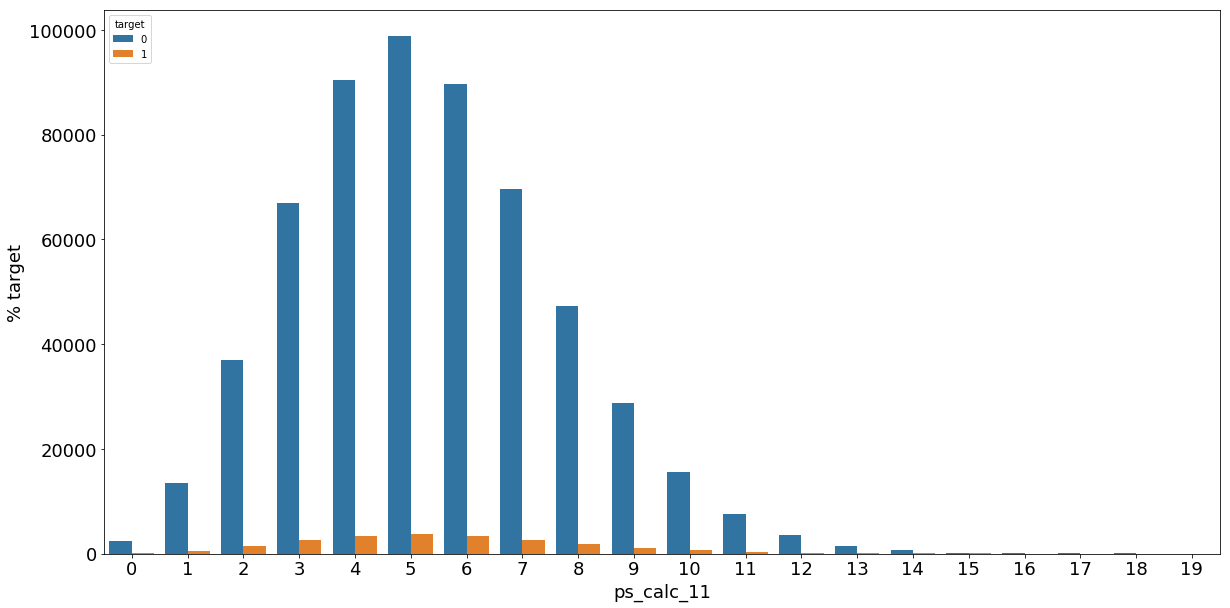

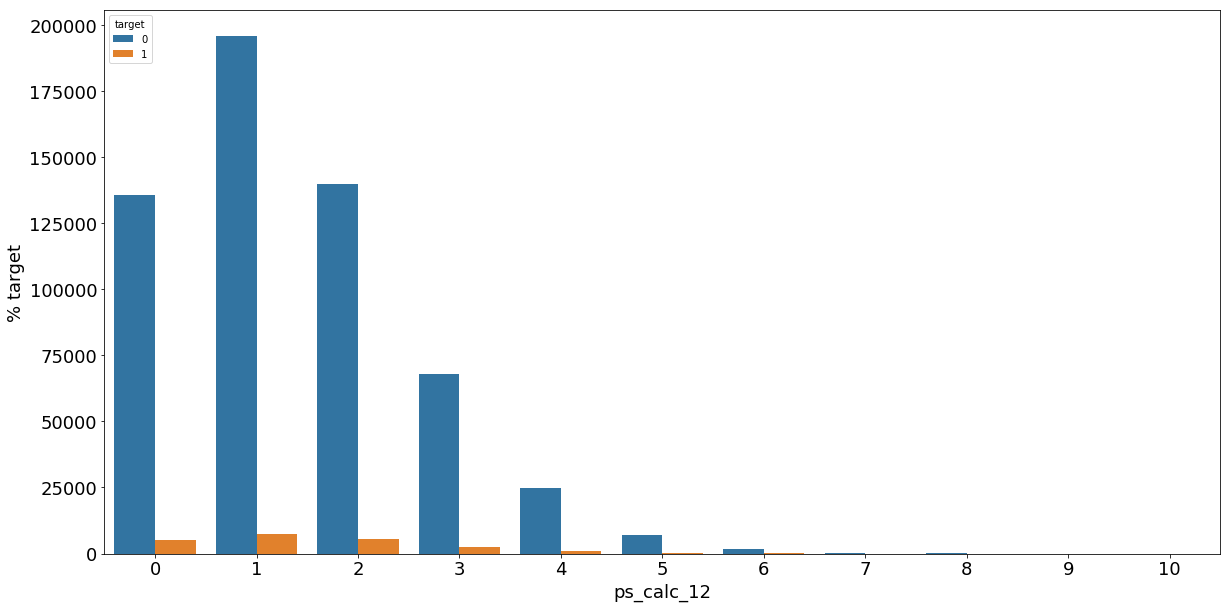

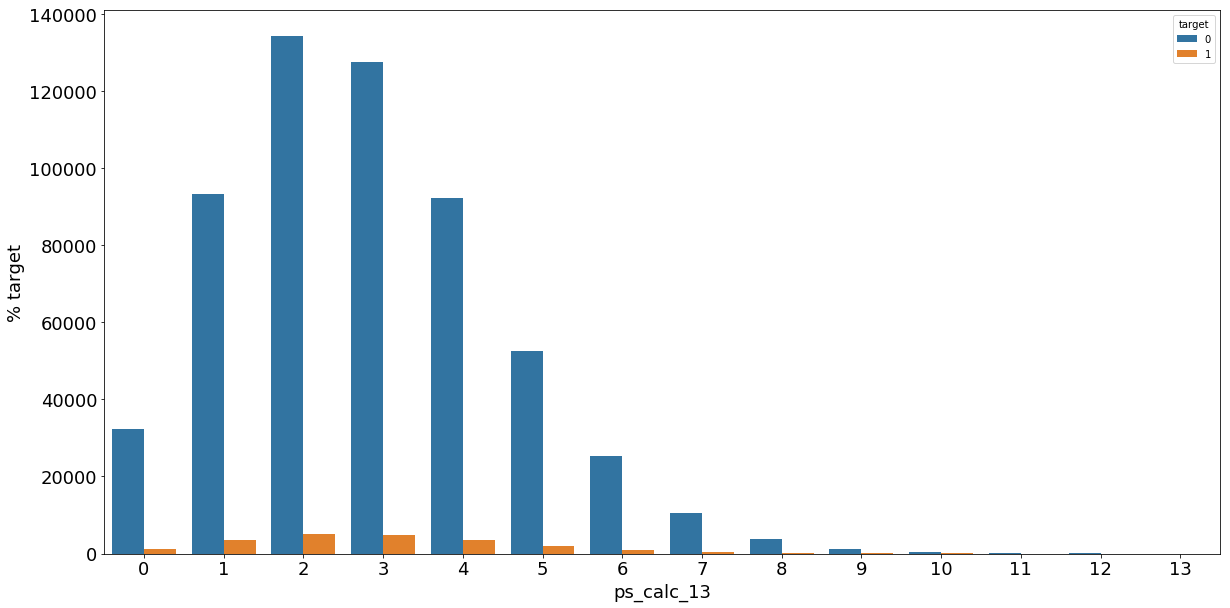

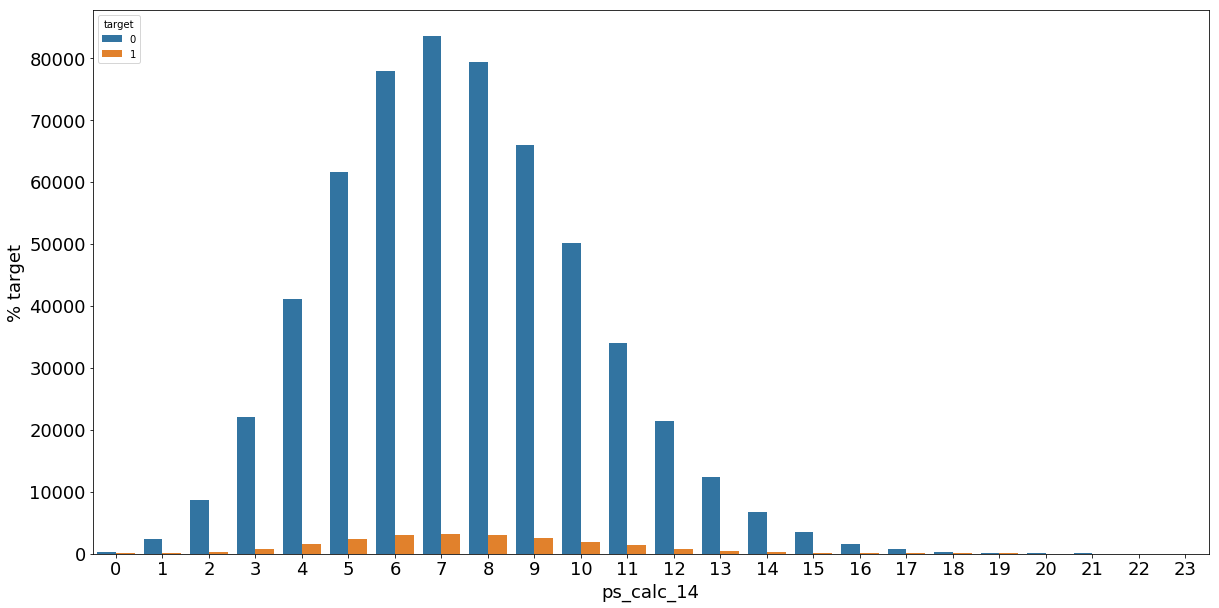

In [17]:
for f in features_dict_data_type['con']:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,10))
    # Calculate the percentage of target=1 per category value
    sns.countplot(x=f, hue="target", data=df)
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show();


In [18]:
from sklearn import manifold

In [ ]:
from sklearn.preprocessing import Imputer

In [26]:
mean_imp = Imputer(missing_values=-1, strategy='mean', axis=0)
mode_imp = Imputer(missing_values=-1, strategy='most_frequent', axis=0)
df['ps_reg_03'] = mean_imp.fit_transform(df[['ps_reg_03']]).ravel()
df['ps_car_12'] = mean_imp.fit_transform(df[['ps_car_12']]).ravel()
df['ps_car_14'] = mean_imp.fit_transform(df[['ps_car_14']]).ravel()
df['ps_car_11'] = mode_imp.fit_transform(df[['ps_car_11']]).ravel()


ValueError: Length of values does not match length of index

In [19]:
tsne = manifold.TSNE(n_components=3, init='pca', random_state=42)

In [21]:
X_tsne = tsne.fit_transform(X)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [36]:
features = list(set(df.columns.tolist()) - set(['id','target']))

In [59]:
a= pd.cut(np.array([.2, 1.4, 2.5, 6.2, 9.7, 2.1]), 3, labels=False, retbins=True)

In [11]:
# bin cont values and move everything to binary

In [78]:
# handle class imbalance
minority_class = df.target.sum()
majority_class = df.target.shape[0] - minority_class

df_majority = df[df['target']==0]
df_minority = df[df['target']==1]

df_majority_downsampled = resample(df_majority, 
                                 replace=False,     # sample with replacement
                                 n_samples=minority_class,    # to match majority class
                                 random_state=125) # reproducible results

df = pd.concat([df_majority_downsampled, df_minority])

In [79]:
df[df.target==1].shape, df[df.target==0].shape

((21694, 59), (21694, 59))

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [115]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression as LR
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.ensemble import AdaBoostClassifier as ADAB
from sklearn.ensemble import GradientBoostingClassifier as GBC

In [118]:
pipe = make_pipeline(VarianceThreshold(),SelectFdr(), GBC(n_estimators=100, max_depth=1000, learning_rate=0.9))

In [119]:
scores = cross_val_score(estimator=pipe, X=X_train, y=y_train, cv=5, n_jobs=-2)
print('CV accuracy scores: %s' % scores); print()
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [ 0.53479797  0.55415578  0.5294208   0.52942984  0.53788228]

CV accuracy: 0.537 +/- 0.009


In [103]:
from sklearn.learning_curve import validation_curve

param_range = [0.001, 0.01, 0.1, 1.0, 10.0]

train_scores, test_scores = validation_curve(
    estimator=pipe,
    X=X_train, y=y_train,
    param_name='logisticregression__C',
    param_range=param_range,
    cv=10,
    n_jobs=12)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



/home/laith/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/laith/anaconda3/lib/python3.5/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


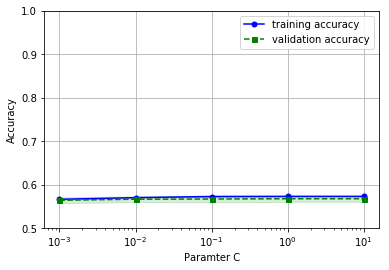

In [105]:
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='upper right')
plt.xlabel('Paramter C')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.show()

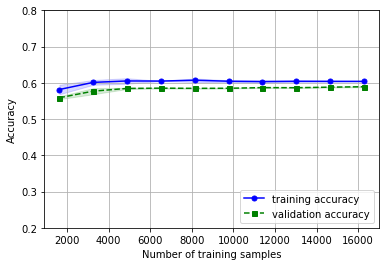

In [106]:
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe, X=X_train, y=y_train, scoring='roc_auc', 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), cv=2, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Add plot of training accuracy
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
# Add standard deviation
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

# Add plot of validation accuracy
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
# Add standard deviation
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.2, 0.8])
plt.show()

In [ ]:
pipe.steps

In [ ]:
## lets see if we can cluster this for a bit
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X)

In [ ]:
pca = PCA(n_components=2).fit(X)

In [ ]:
y_means = KMeans(init=pca.components_, n_clusters=2, n_init=1)

In [ ]:
reduced_data = PCA(n_components=25).fit_transform(X)

In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=20, n_init=10,n_jobs=-2)
cluster_labels = kmeans.fit_predict(reduced_data)
silhouette_avg = silhouette_score(X, cluster_labels)


In [ ]:
n_clusters =7
print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

In [ ]:
h = .02
# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

In [ ]:
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()